# STEP 1- BUSINESS PROBLEM UNDERSTANDING

**You have to predict whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.**

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\PALLAWI WAGDRE\Downloads\train (2).csv")
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


# STEP 2 - DATA UNDERSTANDING

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [3]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [4]:
df.drop(columns = ["id","location"], axis = 1, inplace = True)

In [5]:
df["keyword"].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [6]:
df["text"].unique()

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'Suicide bomber kills 15 in Saudi security site mosque - Reuters via World - Google News - Wall ... http://t.co/nF4IculOje',
       'Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

In [7]:
df["target"].unique()

array([1, 0], dtype=int64)

# STEP 3 - DATA CLEANING

In [8]:
df.duplicated().sum()

72

In [9]:
df.drop_duplicates()

,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,NaN,Two giant cranes holding a bridge collapse int...,1
7609,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,NaN,Police investigating after an e-bike collided ...,1


In [10]:
df['keyword'].mode()[0]

'fatalities'

In [11]:
df['keyword'].fillna('fatalities',inplace = True)

In [12]:
df['keyword'].value_counts()

fatalities               106
deluge                    42
armageddon                42
damage                    41
harm                      41
                        ... 
forest%20fire             19
epicentre                 12
threat                    11
inundation                10
radiation%20emergency      9
Name: keyword, Length: 221, dtype: int64

**Tokenization**

In [13]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [14]:
wnl = WordNetLemmatizer()
corpus = []

for i,row in df.iterrows():
    p = re.sub('[^a-zA-Z]', " ", row["text"])
    p = p.lower()
    p = p.split()
    p = [wnl.lemmatize(word) for word in p if not word in set(stopwords.words("english"))]
    p = " ".join(p)
    corpus.append(p)

print(corpus)

['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident asked shelter place notified officer evacuation shelter place order expected', 'people receive wildfire evacuation order california', 'got sent photo ruby alaska smoke wildfire pours school', 'rockyfire update california hwy closed direction due lake county fire cafire wildfire', 'flood disaster heavy rain cause flash flooding street manitou colorado spring area', 'top hill see fire wood', 'emergency evacuation happening building across street', 'afraid tornado coming area', 'three people died heat wave far', 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding', 'raining flooding florida tampabay tampa day lost count', 'flood bago myanmar arrived bago', 'damage school bus multi car crash breaking', 'man', 'love fruit', 'summer lovely', 'car fast', 'goooooooaaaaaal', 'ridiculous', 'london cool', 'love skiing', 'wonderful day', 'looooool', 'way eat sh

In [15]:
wnl = WordNetLemmatizer()
corpus = []

for i,row in df.iterrows():
    p = re.sub('[^a-zA-Z]', " ", row["keyword"])
    p = p.lower()
    p = p.split()
    p = [wnl.lemmatize(word) for word in p if not word in set(stopwords.words("english"))]
    p = " ".join(p)
    corpus.append(p)

print(corpus)

['fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'fatality', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'ac

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = df[['text']]
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
y = pd.get_dummies(df["target"], drop_first = True)
y 

,1
0,1
1,1
2,1
3,1
4,1
...,...
7608,1
7609,1
7610,1
7611,1


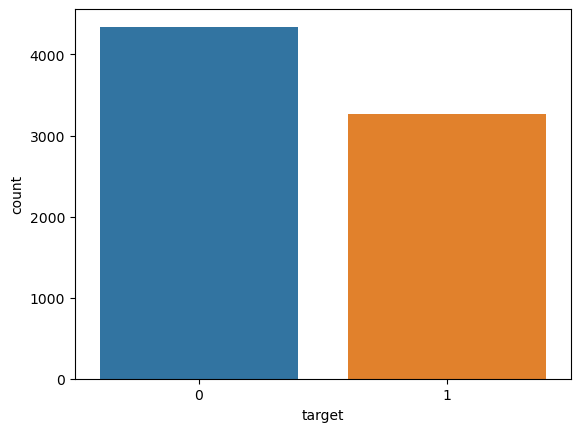

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = df["target"])
plt.show()

# Step 4 - Modelling


In [19]:
X.shape

(7613, 217)

In [20]:
y.shape

(7613, 1)

In [21]:
from sklearn.naive_bayes import MultinomialNB
m = MultinomialNB(alpha= 1000,
    force_alpha='warn',
    fit_prior=True,
    class_prior=None)
m.fit(X,y)

C:\Users\PALLAWI WAGDRE\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1000)

In [22]:
ypred = m.predict(X)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
print("Train Accuracy = ",accuracy_score(y,ypred))
print("Cross Validation Score = ", cross_val_score(m,X,y,cv = 5).mean())

Train Accuracy =  0.5703402075397347
Cross Validation Score =  0.5703401975663567


# Test Data

In [24]:
df_test = pd.read_csv(r"C:\Users\PALLAWI WAGDRE\Downloads\test (2).csv")
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [26]:
df_test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [27]:
df_test['keyword'].mode()[0]

'deluged'

In [28]:
d = pd.DataFrame(df_test['id'])
d

,id
0,0
1,2
2,3
3,9
4,11
...,...
3258,10861
3259,10865
3260,10868
3261,10874


In [29]:
df_test.drop(columns = ["id","location"], axis = 1, inplace = True)

In [30]:
df['keyword'].fillna(df['keyword'].mode()[0],inplace = True)

In [31]:
df_test

,keyword,text
0,NaN,Just happened a terrible car crash
1,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,"there is a forest fire at spot pond, geese are..."
3,NaN,Apocalypse lighting. #Spokane #wildfires
4,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,NaN,Storm in RI worse than last hurricane. My city...
3260,NaN,Green Line derailment in Chicago http://t.co/U...
3261,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [32]:
wnl = WordNetLemmatizer()
corpus = []

for i,row in df_test.iterrows():
    p = re.sub('[^a-zA-Z]', " ", row["text"])
    p = p.lower()
    p = p.split()
    p = [wnl.lemmatize(word) for word in p if not word in set(stopwords.words("english"))]
    p = " ".join(p)
    corpus.append(p)

print(corpus)

['happened terrible car crash', 'heard earthquake different city stay safe everyone', 'forest fire spot pond goose fleeing across street cannot save', 'apocalypse lighting spokane wildfire', 'typhoon soudelor kill china taiwan', 'shaking earthquake', 'probably still show life arsenal yesterday eh eh', 'hey', 'nice hat', 'fuck', 'like cold', 'nooooooooo', 'tell', '', 'awesome', 'birmingham wholesale market ablaze bbc news fire break birmingham wholesale market http co irwqcezweu', 'sunkxssedharry wear short race ablaze', 'previouslyondoyintv toke makinwa marriage crisis set nigerian twitter ablaze http co cmghxba xi', 'check http co roi nsmejj http co tj zjin http co yduixefipe http co lxtjc kls nsfw', 'psa splitting personality techie follow ablaze co burner follow ablaze', 'beware world ablaze sierra leone amp guap', 'burning man ablaze turban diva http co hodwosamws via etsy', 'dis song people take thing run smh eye opener though set game ablaze cyhitheprynce', 'rape victim dy set ab

In [33]:
cvs = CountVectorizer()
X_test = df_test[['text']]
X_test = cv.transform(corpus).toarray()
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
m = MultinomialNB()
m.fit(X,y)

y_test = m.predict(X_test)
y_test

array([0, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [35]:
y_pred = m.predict(X_test)

In [36]:
X_test.shape

(3263, 217)

In [37]:
y_pred = pd.DataFrame(y_pred, columns = ['target'])
y_pred

,target
0,0
1,1
2,1
3,1
4,1
...,...
3258,1
3259,1
3260,1
3261,1


In [38]:
k = pd.concat([d,y_pred], axis = 1)
k

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [39]:
k.to_csv('nlpp.csv', index = False)